In [1]:
import os.path as path
import numpy as np

from scripts.gen_model import gen_model
from scripts.gen_model import apply_physio_data

from scripts.reaction_utils import list_blocked_reactions

from scripts.metabolite_utils import remove_orphan_metabolites

from scripts.io import export_tmodel_cobra
from scripts.io import load_tmodel_cobra

from cobra.io import write_sbml_model

from thermo_flux.tools.drg_tools import reaction_balance
from thermo_flux.tools.drg_tools import calc_model_drG0prime

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


In [2]:
INPUT_MODEL = "datafiles/model.xlsx"
INPUT_KEGGS = "datafiles/ecoli_kegg_id.csv"
INPUT_REED = "regression/reed.csv"
INPUT_INCHI = "regression/InChIs.csv"
INPUT_GAMS = "regression/model_Ecoli_from-gams.xlsx"
INPUT_EXP_DATA = "regression/allPhysioData_formatted_forGSM_20230831.csv"
INPUT_EXP_CONC = "regression/allConcRange_20230912.csv"
INPUT_METABOLOMICS = "regression/metabolomics-Kochanowski_20230925.csv"

MODEL_NAME = "ecoli"

OUTPUT_DIR = "output"
OUTPUT_NAME = f"fca_log"
OUTPUT_LOG = f"{OUTPUT_DIR}{path.sep}{OUTPUT_NAME}_log.txt"

CONDITIONS_TO_REGRESS = ["WT-Glc_I"]

INCLUDE_CO2 = True
INCLUDE_O2 = True
ALLOW_OTHER_EXCRETION = False
RELAX_EXP_FLUX_BOUNDS = 2.0

In [3]:
tmodel = gen_model(MODEL_NAME, INPUT_MODEL, INPUT_KEGGS, INPUT_REED, INPUT_INCHI, INPUT_GAMS, OUTPUT_LOG, True, True)
tmodel = apply_physio_data(tmodel, CONDITIONS_TO_REGRESS[0], INPUT_EXP_DATA, INPUT_EXP_CONC, INPUT_METABOLOMICS, INPUT_GAMS, RELAX_EXP_FLUX_BOUNDS, INCLUDE_CO2, INCLUDE_O2, allow_other_excr=False, output_log=OUTPUT_LOG)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2731723
Set parameter GURO_PAR_DUMP to value 1
Read parameters from file gurobi.env
Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
*** Reading data from Reactions ***
unknown metabolite '2dhglcn[c]' created
unknown metabolite 'nadh[c]' created
unknown metabolite 'glcn[c]' created
unknown metabolite 'nad[c]' created
unknown metabolite 'nadph[c]' created
unknown metabolite 'nadp[c]' created
unknown metabolite '2dhguln[c]' created
unknown metabolite 'idon-L[c]' created
unknown metabolite '3hcinnm[c]' created
unknown metabolite 'o2[c]' created
unknown metabolite 'dhcinnm[c]' created
unknown metabolite 'h2o[c]' cre

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


ncam_c NOTHING DONE!
dmbzid_c NOTHING DONE!
5prdmbz_c NOTHING DONE!
quln_c NOTHING DONE!
sbzcoa_c NOTHING DONE!
xtsn_c NOTHING DONE!
thymd_c NOTHING DONE!
dgsn_c NOTHING DONE!
pppi_c NOTHING DONE!
no2_c NOTHING DONE!
ohpb_c NOTHING DONE!
2ohph_c NOTHING DONE!
2omph_c NOTHING DONE!
2ombzl_c NOTHING DONE!
2ommbl_c NOTHING DONE!
orot5p_c NOTHING DONE!
2oph_c NOTHING DONE!
thmpp_c NOTHING DONE!
ssaltpp_c NOTHING DONE!
pro-L_c NOTHING DONE!
phaccoa_c NOTHING DONE!
pnto-R_c NOTHING DONE!
ugmda_c NOTHING DONE!
uagmda_c NOTHING DONE!
trdrd_c NOTHING DONE!
trdox_c NOTHING DONE!
pdx5p_c NOTHING DONE!
pydxn_c NOTHING DONE!
peamn_c NOTHING DONE!
peEC_c NOTHING DONE!
tagdp-D_c NOTHING DONE!
3php_c NOTHING DONE!
2pglyc_c NOTHING DONE!
pgpEC_c NOTHING DONE!
phe-L_c NOTHING DONE!
phpyr_c NOTHING DONE!
pcEC_c NOTHING DONE!
4r5au_c NOTHING DONE!
2mahmp_c NOTHING DONE!
4ppan_c NOTHING DONE!
ppap_c NOTHING DONE!
4ppcys_c NOTHING DONE!
pan4p_c NOTHING DONE!
r1p_c NOTHING DONE!
34hpp_c NOTHING DONE!
pppn_c 

In [4]:
blocked_p = list_blocked_reactions(tmodel, CONDITIONS_TO_REGRESS[0], OUTPUT_LOG, 1, False)
print(len(blocked_p))

tmodel.remove_reactions(blocked_p, remove_orphans=True)
remove_orphan_metabolites(tmodel)
for rxn in tmodel.reactions:
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel.update_thermo_info(fit_unknown_dfG0=True)

['3HCINNMH', '3HPPPNH', '4HTHRS', '5DGLCNR', 'AADDGT', 'AB6PGH', 'ACACCT', 'ACACT1r', 'ACBIPGT', 'ACGAMT', 'ACMAMUT', 'ACNML', 'ACONMT', 'ACPS1', 'ADHEr', 'ADK4', 'ADNCYC', 'ADOCBIK', 'ADOCBLS', 'AGDC', 'AGMT', 'AHC', 'AHCYSNS', 'ALCD19', 'ALDD19x', 'ALLTAH', 'alltn', 'ALTRH', 'AMANAPE', 'AMANK', 'AMAOTr', 'AMMQT82', 'AMPMS', 'AOXSr', 'AP4AH', 'AP5AH', 'ARAI', 'ARGDC', 'BTS2', 'BUTCT', 'CBIAT', 'CBLAT', 'CDPMEK', 'CHRPL', 'CINNDO', 'CPPPGO', 'CRNBTCT', 'CRNCBCT', 'CRNCDH', 'CYANST', 'CYNTAH', 'DBTSr', 'DDGALK', 'DDGLK', 'DDPGALA', 'DHBD', 'DHBSr', 'DHCIND', 'DHCINDO', 'DHNAOT', 'DHPPD', 'DHPTDC', 'DMATT', 'DMQMT', 'DOGULNR', 'DXPRIi', 'DXPS', 'DXYLK', 'E4PD', 'ECAPEC', 'EDTXS3', 'EDTXS4', 'ENTCS', 'FAO3', 'FAO4', 'FCI', 'FCLK', 'FCLPA', 'FCLT', 'FFSD', 'FHL', 'G1PTT', 'G1SATi', 'GALCTD', 'GALCTND', 'GALKr', 'GALS3', 'GDMANE', 'GLCRAL', 'GLCRD', 'GLTPD', 'glucys', 'GLUTRR', 'GLUTRS', 'GMAND', 'GOFUCR', 'GP4GH', 'GPDDA1', 'GPDDA3', 'GPDDA5', 'GRTT', 'GTHOr', 'GTHS', 'GUI1', 'GUI2', 'HBZO

In [8]:
for r in tmodel.reactions:
    flux_dist = r.upper_bound - r.lower_bound
    if flux_dist > 200:
        print(f"{r.id}: {r.lower_bound}, {r.upper_bound}")

In [5]:
export_tmodel_cobra(tmodel, f"{OUTPUT_DIR}{path.sep}test_model.json")
cobra_model = load_tmodel_cobra(f"{OUTPUT_DIR}{path.sep}test_model.json")
cobra_sbml = write_sbml_model(cobra_model, f"{OUTPUT_DIR}{path.sep}test.sbml")

[{'id': '2dhglcn_c', 'name': '2dhglcn_c', 'compartment': 'c', 'charge': -1, 'formula': 'H8'}, {'id': 'nadh_c', 'name': 'nadh_c', 'compartment': 'c', 'charge': -2, 'formula': 'H27'}, {'id': 'glcn_c', 'name': 'glcn_c', 'compartment': 'c', 'charge': -1, 'formula': 'H11'}, {'id': 'nad_c', 'name': 'nad_c', 'compartment': 'c', 'charge': -1, 'formula': 'H26'}, {'id': 'nadph_c', 'name': 'nadph_c', 'compartment': 'c', 'charge': -4, 'formula': 'H26'}, {'id': 'nadp_c', 'name': 'nadp_c', 'compartment': 'c', 'charge': -3, 'formula': 'H25'}, {'id': '2dhguln_c', 'name': '2dhguln_c', 'compartment': 'c', 'charge': -1, 'formula': 'H9'}, {'id': 'idon-L_c', 'name': 'idon-L_c', 'compartment': 'c', 'charge': -1, 'formula': 'H11'}, {'id': 'o2_c', 'name': 'o2_c', 'compartment': 'c', 'charge': 0, 'formula': 'H0'}, {'id': 'h2o_c', 'name': 'h2o_c', 'compartment': 'c', 'charge': 0, 'formula': 'H2'}, {'id': 'pi_c', 'name': 'pi_c', 'compartment': 'c', 'charge': -2, 'formula': 'H1'}, {'id': '5dglcn_c', 'name': '5dgl

In [6]:
import cobra
import numpy as np
from scipy.linalg import null_space
import networkx as nx

def find_coupled_reactions(model):
    
    S = cobra.util.array.create_stoichiometric_matrix(model, array_type="DataFrame" )
    reaction_ids = S.columns.tolist()
    S_np = S.values
    N = null_space(S_np)

    pairs = {}

    tol = 1e-9

    for i in range(len(reaction_ids)):
        cur_reaction = reaction_ids[i]
        pairs.setdefault(cur_reaction, {})

        for j in range(i + 1, len(reaction_ids)):
            next_reaction = reaction_ids[j]
            pairs.setdefault(next_reaction, {})

            n_i = N[i, :]
            n_j = N[j, :]

            active_columns = np.logical_and(np.abs(n_i) > tol, np.abs(n_j) > tol)

            if np.any(active_columns):
                ratios = n_i[active_columns] / n_j[active_columns]
                
                if np.max(ratios) - np.min(ratios) < tol:
                    ratio = ratios[0]

                    pairs[cur_reaction][next_reaction] = ratio
                    pairs[next_reaction][cur_reaction] = 1 / ratio


    G = nx.Graph()
    G.add_nodes_from(reaction_ids)

    for rxn_a, targets in pairs.items():
        for rxn_b in targets.keys():
            if rxn_a < rxn_b:
                G.add_edge(rxn_a, rxn_b)
    pos = nx.spring_layout(G, k=0.15, iterations=5000)
    nx.draw_networkx_edges(G, pos)
    coupled_reaction_sets = list(nx.connected_components(G))

    final_rxns = {}

    for rxn_set in coupled_reaction_sets:
        if len(rxn_set) > 1:
            
            priority_ids = ['biomass_EX']

            representative = sorted(list(rxn_set))[0]
            
            for p_id in priority_ids:
                if p_id in rxn_set:
                    representative = p_id
            
        
            linked_reactions = {}
            for rxn in rxn_set:
                if rxn == representative:
                    continue
                
                rep_index = reaction_ids.index(representative)
                rxn_index = reaction_ids.index(rxn)
                
                max_rep_index = np.argmax(np.abs(N[rep_index, :]))
                
                ratio_rxn_to_rep = N[rxn_index, max_rep_index] / N[rep_index, max_rep_index]

                linked_reactions[rxn] = ratio_rxn_to_rep
            
            final_rxns[representative] = linked_reactions
            
    return final_rxns

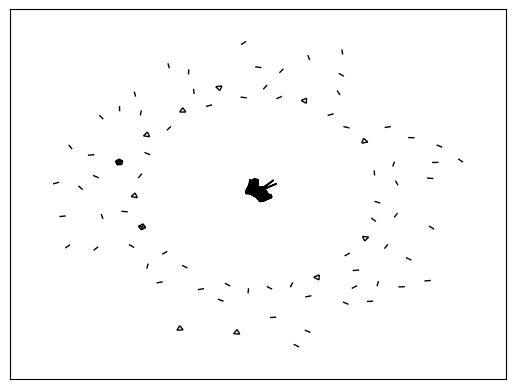

In [7]:
links = find_coupled_reactions(cobra_model)

In [79]:
print(links)
print(len(links))
print(sorted(links['biomass_EX']))

for key in links:
    print(f"{key}: {links[key]}")

{'2DGLCNRx': {'2DGLCNRy': np.float64(-0.9999999999999994)}, 'biomass_EX': {'CHORM': np.float64(0.3070000000000073), 'SULabc': np.float64(0.23305899999998106), 'PSCVT': np.float64(0.41100000000001286), 'UAAGDS': np.float64(0.027599999999986555), 'CLPNSEC': np.float64(0.006449999999948777), 'PRMICIi': np.float64(0.08999999999999185), 'RBFSb': np.float64(1.0000000015807726e-05), 'GLUR': np.float64(-0.027599999999977257), 'PMDPHT': np.float64(1.000000000916581e-05), 'S7PI': np.float64(0.025199999999988787), 'AIRC3': np.float64(-0.49210899999917684), 'ADCS': np.float64(0.05000000000001987), 'GMHEPK': np.float64(0.025199999999981182), 'DHNPA2': np.float64(0.05000000000001157), 'KDOPS': np.float64(0.041999999999919546), 'QULNS': np.float64(0.002729999999148032), 'SPMS': np.float64(0.006999999999994297), 'DAPE': np.float64(0.35359999999999386), 'DB4PS': np.float64(2.0000000031482614e-05), 'C181SN': np.float64(0.13545000000146162), 'APRAUR': np.float64(1.0000000003121666e-05), 'EX_so4': np.floa

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def plot_density(base_bounds, fva_bounds, ids, title_name, mode_names, ln=False):
    if len(base_bounds) != len(fva_bounds):
        return
    
    n = len(base_bounds)

    df_base = pd.DataFrame(base_bounds, columns=['lb', 'ub'], index=ids)
    df_fva = pd.DataFrame(fva_bounds, columns=['lb', 'ub'], index=ids)

    df_base['range'] = df_base['ub'] - df_base['lb']
    df_fva['range'] = df_fva['ub'] - df_fva['lb']

    range_base = df_base['range']
    range_fva = df_fva['range']

    print(max(range_base))
    print(max(range_fva))
    
    model_type_base = pd.Series([mode_names[0]] * n, index=df_base.index)
    model_type_fva = pd.Series([mode_names[1]] * n, index=df_fva.index)

    data = pd.DataFrame({
        'Range': pd.concat([range_base, range_fva]),
        'Data': pd.concat([model_type_base, model_type_fva])
    })

    #data = data[data['Range'] > 1e-6]

    plt.figure(figsize=(10, 6))

    # Use seaborn.kdeplot for Kernel Density Estimation
    ax = sns.kdeplot(
        data=data,
        x='Range',
        hue='Data',
        fill=True,
        alpha=0.6,
        linewidth=1.5,
        cumulative=True,
        common_norm=False, # Normalize each distribution separately
        palette={mode_names[1]: 'skyblue', mode_names[0]: 'salmon'},
        legend=True
    )

    # Set titles and labels
    plt.title(f"Range distributions for {title_name}", fontsize=16)
    plt.xlabel('Range', fontsize=12)
    plt.ylabel('Cumulative proportion', fontsize=12)

    # Optional: Log scale for highly skewed data (lots of small ranges, few huge ones)
    # If the plot looks compressed near zero, uncomment the line below.
    if ln:
        plt.xscale('log') 

    #plt.legend(title='Data')
    #ax.legend(title='Data', loc='upper left')
    #plt.grid(axis='y', linestyle='--', alpha=0.7)

    #handles, labels = g.get_legend_handles_labels()
    ax.legend(labels=mode_names, title='Model', loc='upper left')

    plt.show()


In [9]:
from scripts.gen_model import run_fva
import pandas as pd

In [11]:
base_bounds = []
for r in tmodel.reactions:
    base_bounds.append( (r.lower_bound, r.upper_bound) )
fva_bounds = run_fva(tmodel, OUTPUT_LOG)

print(len(base_bounds) == len(fva_bounds))

True


In [ ]:
import cobra.sampling
import logging

In [21]:
cobra_model.optimize()

,fluxes,reduced_costs
2DGLCNRx,0.000000,0.0
2DGLCNRy,0.000000,0.0
2DGULRx,0.000000,0.0
2DGULRy,0.000000,0.0
A5PISO,0.028175,0.0
...,...,...
biomass_ce,0.670839,0.0
biomass_EX,0.670839,0.0
OROTex,0.000000,0.0
DCTA,0.355406,0.0


In [ ]:

def validate_coupling(cobra_model, coupling_results, samples=500, tolerance=1e-9):
    cobra_model.optimize()
    success = 0
    print(len(cobra_model.reactions))
    try:
        sampling_solution = cobra.sampling.sample(cobra_model, n=samples, processes=1)
    except Exception as e:
        print("Model is infeasible")
        return pd.DataFrame()
    
    validation_data = []

    # Iterate through all coupled pairs
    for rep_id in coupling_results:

        links = coupling_results[rep_id]
        print(f"Current: {rep_id}, {links}")
        if rep_id not in sampling_solution.columns:
            print(f"Reporting reaction {rep_id} not found in model flux space. Skipping.")
            continue

        rep_fluxes = sampling_solution[rep_id]

        for linked_id in links:
            expected_ratio = coupling_results[rep_id][linked_id]
            print(f"{linked_id} - {expected_ratio}")
            if linked_id not in sampling_solution.columns:
                print(f"Linked reaction {linked_id} not found. Skipping.")
                continue

            linked_fluxes = sampling_solution[linked_id]


            valid_indices = np.abs(rep_fluxes) > tolerance
            
            if not np.any(valid_indices):
                validation_data.append({
                    'Reporting_Rxn': rep_id,
                    'Linked_Rxn': linked_id,
                    'Expected_Ratio': expected_ratio,
                    'Validity': 'Skipped (flux always zero)',
                    'Pass_Rate': 0.0,
                    'Max_Error': np.nan
                })
                continue
            
            valid_rep_fluxes = rep_fluxes[valid_indices]
            valid_linked_fluxes = linked_fluxes[valid_indices]

            observed_ratios = valid_linked_fluxes / valid_rep_fluxes
            
            absolute_errors = np.abs(observed_ratios - expected_ratio)
            
            pass_count = np.sum(absolute_errors < tolerance)
            total_valid_samples = len(valid_rep_fluxes)
            
            pass_rate = (pass_count / total_valid_samples) if total_valid_samples > 0 else 0.0
            
            # Determine overall validity
            if pass_rate > 0.99:
                validity = 'Validated'
                success += 1
            elif pass_rate > 0.9:
                validity = 'Weak (Check Tolerance)'
            else:
                validity = 'Failed'

            validation_data.append({
                'Reporting_Rxn': rep_id,
                'Linked_Rxn': linked_id,
                'Expected_Ratio': expected_ratio,
                'Validity': validity,
                'Pass_Rate': pass_rate,
                'Max_Error': absolute_errors.max()
            })
    print(success)
    print(f"Passed: {success} / {len(cobra_model.reactions)}")
    return pd.DataFrame(validation_data)

In [47]:
res = validate_coupling(cobra_model, links)

623
Read LP format model from file /tmp/tmp_gmlbmo6.lp
Reading time = 0.00 seconds
: 454 rows, 1246 columns, 6358 nonzeros
Current: 2DGLCNRx, {'2DGLCNRy': np.float64(-0.9999999999999994)}
2DGLCNRy - -0.9999999999999994
Current: biomass_EX, {'UAGDP': np.float64(0.07199999999993144), 'PHETA1': np.float64(-0.17600000000000018), 'PRMICIi': np.float64(0.08999999999999185), 'DNMPPA': np.float64(0.05000000000001318), 'MDRPD': np.float64(0.006999999999983106), 'TDSK': np.float64(0.008399999999978983), 'METAT': np.float64(0.006999999999990943), 'ADCL': np.float64(0.0500000000000195), 'DHDPRy': np.float64(0.3535999999999895), 'SULabc': np.float64(0.23305899999998106), 'PGAMT': np.float64(-0.07199999999993759), 'METS': np.float64(0.1460000000000127), 'PRAIS': np.float64(0.4921089999991794), 'MOAT': np.float64(0.008399999999973137), 'PANTS': np.float64(5.9000000006767906e-05), 'MTRI': np.float64(0.006999999999983571), 'OMCDC': np.float64(0.4280000000000043), 'MTAN': np.float64(0.006999999999999179

In [48]:
print(res)

    Reporting_Rxn Linked_Rxn  Expected_Ratio   Validity  Pass_Rate  \
0        2DGLCNRx   2DGLCNRy          -1.000  Validated        1.0   
1      biomass_EX      UAGDP           0.072  Validated        1.0   
2      biomass_EX     PHETA1          -0.176  Validated        1.0   
3      biomass_EX    PRMICIi           0.090  Validated        1.0   
4      biomass_EX     DNMPPA           0.050  Validated        1.0   
..            ...        ...             ...        ...        ...   
247         NO3R1      NO3R2          -1.000  Validated        1.0   
248        SERt2r      SERt4          -1.000  Validated        1.0   
249       TMAOR1e    TMAOR2e          -1.000  Validated        1.0   
250        VALabc     VALt2r          -1.000  Validated        1.0   
251        XYLabc      XYLt2          -1.000  Validated        1.0   

        Max_Error  
0    5.551115e-16  
1    6.912526e-14  
2    2.803313e-15  
3    8.756884e-15  
4    5.678791e-14  
..            ...  
247  9.279688e-12  

In [9]:
print(base_bounds)

for r in base_bounds:
    flux_dist = r[1] - r[0]
    if flux_dist > 200:
        print(f"{r[0]}, {r[1]}")

NameError: name 'base_bounds' is not defined

200.0
200.0


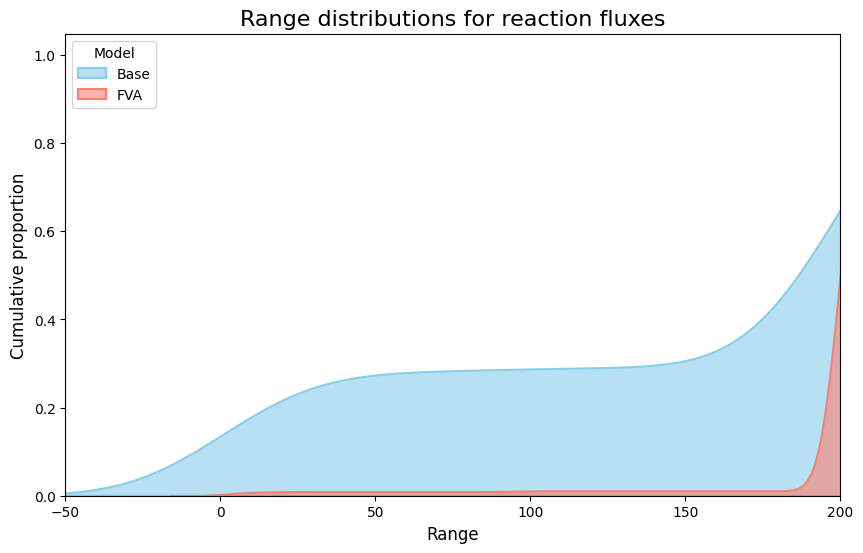

In [20]:
plot_density(base_bounds, fva_bounds, [x.id for x in tmodel.reactions], "reaction fluxes", ["Base", "FVA"])

In [51]:
from scripts.metabolite_utils import get_met_tva

In [50]:
mets_base = []
for x in tmodel.metabolites:
    mets_base.append((x.lower_bound.m, x.upper_bound.m))

print(mets_base)
mets_tva = get_met_tva(tmodel,"hpc/WT-Glc_I_TFVA_Conc.mps.gz_objval.txt")

[(np.float64(0.0001), np.float64(1.0)), (np.float64(0.0001), np.float64(2.83314013008588)), (np.float64(0.0001), np.float64(0.7510094609224821)), (np.float64(0.0001), np.float64(21.680209268635856)), (np.float64(0.0001), np.float64(2.81973586946604)), (np.float64(0.0001), np.float64(0.06950785924102033)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.1), np.float64(0.3)), (np.float64(1000.0), np.float64(1000.0)), (np.float64(20.0), np.float64(25.0)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.08564761062961353), np.float64(3.1629553044354948)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.0001), np.float64(1.0)), (np.float64(1.6207718035278513), np.float64(44.590320862761615)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.0001), np.float64(2.0997531815128596)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.0001), np.float64(1.0)), (np.float64(0.0001), np.float64(1.0)), 

In [27]:
import importlib

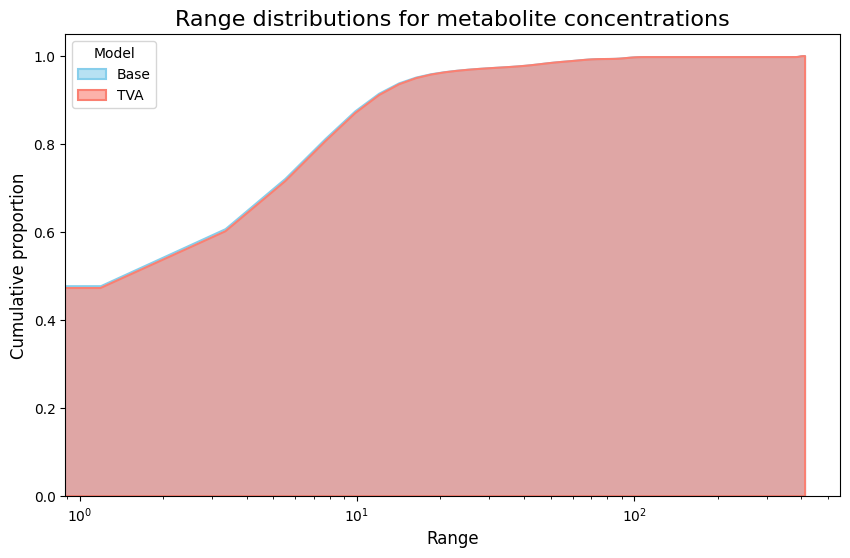

In [68]:
plot_density(mets_base, mets_tva, [x.id for x in tmodel.metabolites], "metabolite concentrations", ["Base", "TVA"], ln=True)

In [33]:
reactions = [r.id for r in tmodel.reactions]
dont_count = []
for key in links:
    for x in links[key]:
        dont_count.append(x)
x = set(dont_count)
print(len(x))

252


In [38]:
len(reactions) - 252

371

In [ ]:
nx.draw(links)